Script to explore potential smoothing effect on CFA data due to dipping layers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('../../data/osu_cfa/ALHIC2201_CFA_OSU_NOV2025_prelim.csv')
df.head()

,depth,d18O,d17O,dD,dxs,CH4,CO,concentration,total_counts,small,medium,large,XL,small_percentage,medium_percentage,large_percentage,XL_percentage,age
0,0.00,-42.105682,-22.399210,-333.016773,3.828684,645.748903,0.055761,1192.967580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,-39.584441,-21.059456,-317.448121,-0.772593,644.977136,0.059819,3550.764350,337.666667,265.666667,72.000000,0.000000,0.000000,78.677196,21.322804,0.000000,0.000000,NaN
2,0.10,-39.371627,-20.983999,-317.029221,-2.056203,616.075203,0.059558,9682.012793,806.919192,670.191919,133.090909,2.181818,1.454545,79.516601,20.397004,0.051837,0.034558,NaN
3,0.15,-39.459364,-21.046753,-318.352804,-2.677891,514.526616,0.058486,9454.641429,4209.000000,3603.000000,576.000000,18.000000,12.000000,85.602281,13.684961,0.427655,0.285103,NaN
4,0.20,-39.265754,-20.926659,-316.166161,-2.040125,NaN,NaN,10237.391395,3964.666667,3449.166667,478.000000,26.500000,11.000000,87.089287,11.949550,0.684215,0.276948,NaN


In [3]:
df['depth'].max()

68.95

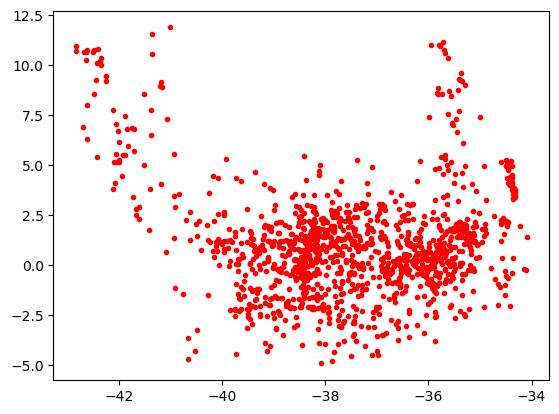

In [4]:
plt.plot(df['d18O'], df['dxs'],'r.')

In [5]:
df = pd.read_csv('../../data/osu_cfa/ALHIC 2201 dust, methane, water (2024-07-01).csv')
df.head()

,core_id,interpolate_final,DateTime,time_methane,time_water,time_abakus,CH4_corrected,pred_d18O,pred_d17O,pred_dD,calc_excess_d,adj_counts,concentration,flow_rate,length_final,TD_segment_final,BD_segment_final
0,2201_01_1C,0.035000,2024-03-04 12:23:56.151,1.709584e+09,1.709584e+09,1.709555e+09,643.831716,-42.258677,-22.487925,-332.981053,5.088365,67.0,19.451864,3.4444,0.275,0.035,0.31
1,2201_01_1C,0.035110,2024-03-04 12:23:56.151,1.709584e+09,1.709584e+09,1.709555e+09,643.831716,-42.258677,-22.487925,-332.981053,5.088365,67.0,19.451864,3.4444,0.275,0.035,0.31
2,2201_01_1C,0.035220,2024-03-04 12:23:56.151,1.709584e+09,1.709584e+09,1.709555e+09,643.831716,-42.258677,-22.487925,-332.981053,5.088365,67.0,19.451864,3.4444,0.275,0.035,0.31
3,2201_01_1C,0.035330,2024-03-04 12:23:56.151,1.709584e+09,1.709584e+09,1.709555e+09,643.831716,-42.258677,-22.487925,-332.981053,5.088365,67.0,19.451864,3.4444,0.275,0.035,0.31
4,2201_01_1C,0.035439,2024-03-04 12:23:57.058,1.709584e+09,1.709584e+09,1.709555e+09,643.831716,-42.428941,-22.819296,-332.675266,6.756260,67.0,19.451864,3.4444,0.275,0.035,0.31


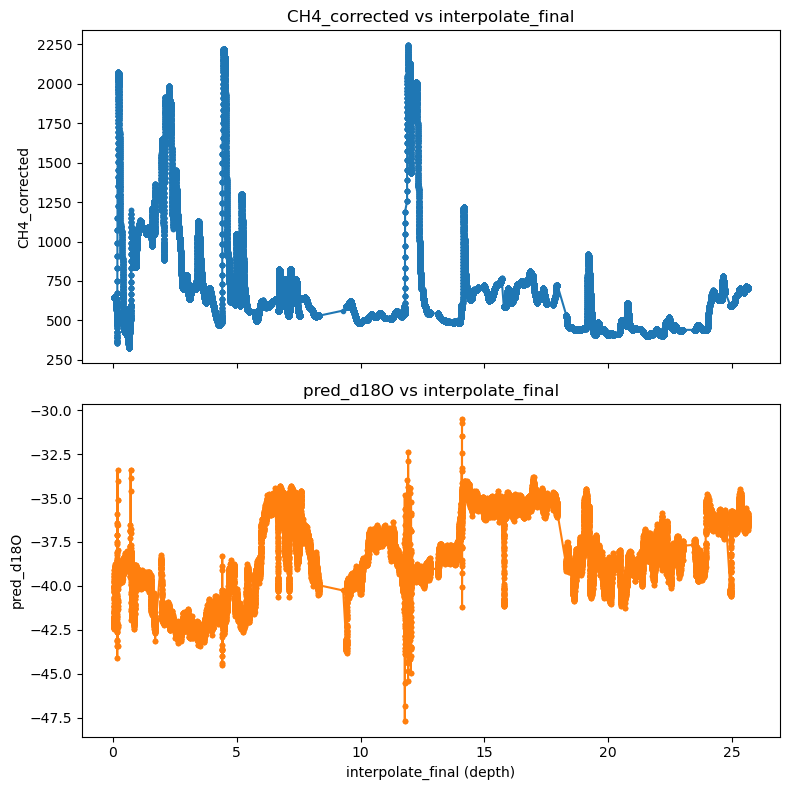

In [6]:

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Upper: CH4_corrected vs interpolate_final
axes[0].plot(df['interpolate_final'], df['CH4_corrected'], marker='o', linestyle='-', markersize=3)
axes[0].set_ylabel('CH4_corrected')
axes[0].set_title('CH4_corrected vs interpolate_final')

# Lower: pred_d18O vs interpolate_final
axes[1].plot(df['interpolate_final'], df['pred_d18O'], marker='o', linestyle='-', markersize=3, color='C1')
axes[1].set_ylabel('pred_d18O')
axes[1].set_xlabel('interpolate_final (depth)')
axes[1].set_title('pred_d18O vs interpolate_final')

plt.tight_layout()
plt.show()

In [7]:
# compute the variance of the 'CH4_corrected' column
variance_ch4 = df['CH4_corrected'].var()
print(f'Variance of CH4_corrected: {variance_ch4}')

# compute the std of the 'ch4' column
std_ch4 = df['CH4_corrected'].std()
print(f'Standard Deviation of CH4_corrected: {std_ch4}')

# compute the variance of the pred_d18O column
variance_d18O = df['pred_d18O'].var()
print(f'Variance of pred_d18O: {variance_d18O}')



Variance of CH4_corrected: 110403.05096356795
Standard Deviation of CH4_corrected: 332.2695456456519
Variance of pred_d18O: 5.105695523939729


In [8]:
# compute the smoothed d18O using a running mean with a tolerance based on dip angle



def smooth_running_mean(df, xcol, ycol, outcol, tol):

    # initialize output column
    df[outcol] = np.nan

    # compute running mean within ±tol separately for each core_id
    for core_id, idx in df.groupby('core_id').groups.items():
        grp = df.loc[idx]
        x = grp[xcol].values
        y = grp[ycol].values
        if x.size == 0:
            continue

        order = np.argsort(x)
        x_sorted = x[order]
        y_sorted = y[order]

        # cumulative sum for fast window sums
        cs = np.concatenate(([0.0], np.cumsum(y_sorted)))

        res_sorted = np.empty_like(y_sorted, dtype=float)
        for k, v in enumerate(x_sorted):
            left = np.searchsorted(x_sorted, v - tol, side='left')
            right = np.searchsorted(x_sorted, v + tol, side='right')
            count = right - left
            res_sorted[k] = (cs[right] - cs[left]) / count if count > 0 else np.nan

        # put results back into original group order and assign to dataframe
        res = np.empty_like(res_sorted)
        res[order] = res_sorted
        df.loc[idx, outcol] = res

    return(df)

In [9]:
tol = 2.7 * np.tan(np.radians(69))  # tolerance in xcol units
xcol = 'interpolate_final'
ycol = 'pred_d18O'
outcol = 'd18O-smoothed'

df = smooth_running_mean(df, xcol, ycol, outcol, tol)


tol = 2.7 * np.tan(np.radians(69))  # tolerance in xcol units
xcol = 'interpolate_final'
ycol = 'CH4_corrected'
outcol = 'CH4-smoothed'

df = smooth_running_mean(df, xcol, ycol, outcol, tol)

In [10]:
variance_d18O_smoothed = df['d18O-smoothed'].var()
print(f'Variance of d18O-smoothed: {variance_d18O_smoothed}')

variance_ch4_smoothed = df['CH4-smoothed'].var()
print(f'Variance of CH4-smoothed: {variance_ch4_smoothed}')

Variance of d18O-smoothed: 4.328535687752457
Variance of CH4-smoothed: 88928.60570348335
